# Bases de Datos III - Proyecto (15%)

## Twitch Social Networks - Análisis de Redes Sociales en Twitch

## Introducción

Este dataset se centra en las redes de usuarios de Twitch, que es una plataforma popular para la transmisión de videojuegos en vivo. Los nodos en estas redes representan a los usuarios de Twitch, mientras que las aristas representan amistades mutuas entre ellos. El dataset incluye diversas características de los usuarios, como los juegos que les gustan y su ubicación, y se centra en la tarea de clasificación binaria de nodos para predecir si un usuario usa lenguaje explícito en sus transmisiones.

### Descripción del Dataset



#### Variables

- **Nodes (Nodos)**: Representan los usuarios individuales en la red de Twitch.
- **Edges (Aristas)**: Representan las relaciones de amistad entre los usuarios.
- **Density (Densidad)**: Es una medida de cuán conectada está la red.
- **Transitivity (Transitividad)**: Es una medida de la tendencia a formar triángulos en la red.
- **Features (Características)**: Atributos de los usuarios como juegos jugados, ubicación, y hábitos de transmisión.



#### Estadísticas del Dataset

- **Número de Nodos**: Varía entre 1,912 y 9,498 dependiendo del idioma.
- **Número de Aristas**: Varía entre 31,299 y 153,138.
- **Densidad**: Varía entre 0.002 y 0.017.
- **Transitividad**: Varía entre 0.042 y 0.131.



### Descripción detallada de los archivos y datos

#### `musae_ES_edges.csv`
Este archivo contiene las relaciones entre diferentes nodos (usuarios de Twitch). Las columnas "from" y "to" representan identificadores únicos de usuarios en Twitch. Cada fila en este archivo muestra una relación de amistad entre dos usuarios.

#### `musae_ES_features.json`
Este archivo en formato JSON contiene características de cada nodo. Cada clave es un identificador único para un nodo y el valor asociado es una lista de características. Estas pueden incluir varios aspectos como los juegos que juegan, su ubicación geográfica, etc.

Lamentablemente como no se cuenta con una leyenda o guia, nos vemos en la imposibilitados de realizar los siguientes tipoos de analisis:

1. **Análisis Descriptivo**: Sin entender qué representa cada variable, te resultará difícil realizar un análisis descriptivo significativo que ofrezca insights sobre los datos.

2. **Modelado Supervisado**: Los modelos de aprendizaje supervisado requieren un buen entendimiento de las características para ser efectivos. No saber qué representan las variables puede hacer que no sepas qué modelo aplicar ni cómo interpretar los resultados.

3. **Correlaciones y Relaciones**: Sin entender qué significan las variables, sería inútil calcular correlaciones o relaciones entre ellas, ya que no podrías interpretar el significado de estas relaciones.

En resumen, aunque puedes realizar ciertos tipos de análisis no supervisados, como agrupamiento o reducción de dimensionalidad, la falta de una leyenda o guía que explique las características limita seriamente tu capacidad para generar insights significativos o aplicables.

#### `musae_ES_target.csv`
Este archivo contiene información adicional sobre cada nodo, representada en diferentes campos:

* id: Identificador único para cada nodo.
* days: Número de días desde algún evento significativo (e.g., creación de la cuenta).
* mature: Indica si el streamer utiliza lenguaje explícito (True/False).
* views: Número de vistas que ha recibido el nodo.
* partner: Indica si el nodo es un socio de Twitch (True/False).
* new_id: Otro identificador para el nodo, aunque su uso no está claro.

### Cargar y Previsualización del Dataset

In [1]:
import pandas as pd
import json

# Cargar los archivos
edges = pd.read_csv('./data/twitch_ES/musae_ES_edges.csv')
with open('./data/twitch_ES/musae_ES_features.json') as f:
    features = json.load(f)
target = pd.read_csv('./data/twitch_ES/musae_ES_target.csv')

# Mostrar los primeros registros de cada archivo
print("Primeros registros de Edges:")
print(edges.head())
print("\nPrimeros registros de Features:")
for key, value in list(features.items())[:5]:
    print(f"{key}: {value}")
print("\nPrimeros registros de Target:")
print(target.head())


Primeros registros de Edges:
   from    to
0     0  1819
1     0  2840
2     1  1565
3     1  1309
4     1  1397

Primeros registros de Features:
1412: [89, 166, 1040, 846, 2987, 1649, 920, 224, 3097, 400, 569, 822, 2362, 802, 2728, 2734]
3032: [515, 1943, 289, 3084, 1575, 3164, 920, 224, 3097, 400, 1391, 635, 569, 821, 2645, 1147, 440]
4032: [1948, 421, 586, 202, 2024, 846, 45, 3164, 920, 224, 2798, 2064, 2534, 139, 2664, 2362]
3945: [438, 2464, 967, 861, 152, 1649, 920, 1907, 2185, 2986, 1607, 1895, 1013, 928, 569, 139, 608, 2362, 802, 1530, 1028, 1147, 763, 2734, 82]
949: [2598, 1713, 1053, 2928, 473, 846, 920, 224, 3097, 706, 1525, 2912, 2362]

Primeros registros de Target:
          id  days  mature   views  partner  new_id
0   68458707  1522   False    4405    False    3558
1  133928858   768   False  164810     True    3372
2   46892468  1895   False    4953    False     818
3  128745923   828    True   12262    False     236
4   84422595  1317   False    4937    False    2255


### Tareas posibles:

#### Transferencia de Aprendizaje

La transferencia de aprendizaje se refiere al método por el cual un modelo desarrollado para una tarea particular se adapta para una segunda tarea relacionada. Por ejemplo, si se han recopilado datos de usuarios que transmiten en un idioma en particular en Twitch, un modelo entrenado para clasificar estos usuarios podría transferirse para clasificar usuarios que transmiten en otro idioma.

**Aplicaciones**
- Mejorar el rendimiento del modelo en datasets más pequeños.
- Rápido despliegue de modelos en diferentes contextos.

#### Clasificación Binaria de Nodos

En el contexto de las redes sociales, los nodos suelen representar entidades como usuarios o elementos de contenido. La clasificación binaria de nodos involucra etiquetar estos nodos en una de dos categorías. Por ejemplo, en una red de Twitch, podríamos querer clasificar si un streamer utiliza o no lenguaje explícito.

**Aplicaciones**
- Filtrado de contenido.
- Personalización de la experiencia del usuario.


#### Predicción de Enlaces

La predicción de enlaces trata de prever futuras relaciones entre nodos en una red. En una red social como Twitch, esto podría significar predecir quiénes se seguirán mutuamente en el futuro.

**Aplicaciones**
- Sugerencia de amigos o conexiones.
- Detección de spam o comportamiento malicioso.

#### Detección de Comunidades

La detección de comunidades involucra identificar grupos de nodos que interactúan más frecuentemente entre sí que con nodos fuera del grupo. Estos pueden representar, por ejemplo, grupos de streamers que suelen jugar los mismos juegos o que comparten una base de seguidores similar.

**Aplicaciones**
- Segmentación de mercado.
- Recomendación de contenido.

#### Visualización de Redes

La visualización de redes permite representar gráficamente la estructura de la red, lo que puede hacer más fácil identificar patrones, como comunidades o nodos influyentes.

**Aplicaciones**
- Análisis exploratorio de datos.
- Comunicación de hallazgos en informes o presentaciones.

## 1. Depuraración del dataset escogido para su correcta manipulación en los análisis (10%)

### 1.1 Carga del Dataset y Revisión Inicial

In [7]:
import pandas as pd
import json

# Cargar CSV de aristas
edges_df = pd.read_csv("./data/twitch_ES/musae_ES_edges.csv")
print("Primeros registros de aristas:")
print(edges_df.head())

# Cargar JSON de características de nodos
with open("./data/twitch_ES/musae_ES_features.json") as f:
    features_json = json.load(f)

# Convertir las claves del diccionario JSON en números
features_json = {int(key): value for key, value in features_json.items()}

# Convertir el diccionario JSON de características en un DataFrame
features_df = pd.DataFrame(list(features_json.items()), columns=['Clave', 'Valor'])

# Ordenar el DataFrame por la columna 'Clave' de menor a mayor
features_df = features_df.sort_values(by='Clave', ascending=True)

# Establecer 'Clave' como el nuevo índice
features_df = features_df.set_index('Clave')

print("\nPrimeras características de nodos:")
print(features_df.head().to_string(header=False))

# Cargar CSV de targets (objetivos)
target_df = pd.read_csv("./data/twitch_ES/musae_ES_target.csv")
print("\nPrimeros registros de objetivos:")
print(target_df.head())

Primeros registros de aristas:
   from    to
0     0  1819
1     0  2840
2     1  1565
3     1  1309
4     1  1397

Primeras características de nodos:
Clave                                                                                                                                
0                            [515, 1222, 1466, 1060, 653, 359, 861, 920, 224, 3097, 2510, 2549, 2524, 1156, 83, 569, 1689, 2501, 997]
1      [1951, 2770, 1523, 861, 1190, 846, 920, 224, 810, 3142, 588, 1108, 257, 840, 502, 1213, 3054, 822, 803, 1796, 2645, 436, 2728]
2                                  [308, 3152, 2212, 2323, 2921, 653, 920, 224, 3097, 615, 1108, 3054, 569, 608, 803, 436, 2645, 502]
3                           [194, 433, 2392, 330, 2928, 473, 48, 920, 224, 3097, 1132, 1013, 2764, 3051, 821, 3044, 2645, 2737, 2424]
4                                                               [1726, 216, 3059, 653, 1093, 1174, 2814, 119, 1644, 2774, 2661, 2936]

Primeros registros de objetivos:
          i

### 1.2 Verificación de Integridad

In [8]:
print("Valores faltantes en aristas:", edges_df.isna().sum())
print("Valores faltantes en objetivos:", target_df.isna().sum())

# Para el archivo de características, como es un JSON, podríamos hacer algo más manual:
missing_features = {k: v for k, v in features_json.items() if not v}
print("Valores faltantes en características:", len(missing_features))


Valores faltantes en aristas: from    0
to      0
dtype: int64
Valores faltantes en objetivos: id         0
days       0
mature     0
views      0
partner    0
new_id     0
dtype: int64
Valores faltantes en características: 0


#### 1.2.2 Eliminación de datos faltantes

In [9]:
edges_df.dropna(inplace=True)
target_df.dropna(inplace=True)

#### 1.2.3 Eliminación nodos o aristas duplicadas

In [10]:
edges_df.drop_duplicates(inplace=True)
target_df.drop_duplicates(subset='id', inplace=True)

### 1.3 Identificación y Tratamiento de Outliers usando el método IQR

#### 1.3.1 Justificación para usar IQR

Hemos decidido usar el método del Rango Intercuartílico (IQR, por sus siglas en inglés) para el tratamiento de outliers en nuestro conjunto de datos. Las razones para esta elección son:

1. **Robustez**: El método IQR es robusto ante valores extremos, lo que lo hace especialmente útil para conjuntos de datos con outliers pronunciados.

2. **No paramétrico**: A diferencia de otros métodos como el Z-score, el IQR no hace suposiciones sobre la distribución subyacente de los datos. Esto lo hace más versátil y aplicable a una gama más amplia de escenarios.

3. **Independencia de la forma de la distribución**: El método IQR no requiere que los datos sigan una distribución específica, como la distribución normal, lo que lo hace adecuado para nuestro conjunto de datos.

4. **Aplicabilidad a nuestras características**: Dado que estamos trabajando con una red, algunas de las métricas pueden tener distribuciones largamente sesgadas o con una forma inusual. El método IQR es especialmente útil en tales circunstancias.

#### 1.3.2 Aplicación del método IQR

##### Aplicando en las caracteristicas de los nodos

##### Aplicando en los nodos

In [11]:
import pandas as pd

# Seleccionamos las columnas numéricas que nos interesan
numeric_cols = ['days', 'views', 'new_id']

# Aplicar el método IQR para cada columna numérica
for col in numeric_cols:
    Q1 = target_df[col].quantile(0.25)
    Q3 = target_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = target_df[(target_df[col] < lower_bound) | (target_df[col] > upper_bound)]
    
    # Tratamiento de outliers (cambiar por la mediana)
    median_value = target_df[col].median()
    target_df[col].fillna(median_value, inplace=True)


### 1.4 Conversión de Tipos de Datos

#### 1.4.1 Identificación de Tipos de Datos Actuales

In [12]:
print("Tipos de datos de edges_df:")
print(edges_df.dtypes)

print("\nTipos de datos de target_df:")
print(target_df.dtypes)

print("\nTipos de datos de features:")
print(features_df.dtypes)


Tipos de datos de edges_df:
from    int64
to      int64
dtype: object

Tipos de datos de target_df:
id         int64
days       int64
mature      bool
views      int64
partner     bool
new_id     int64
dtype: object

Tipos de datos de features:
Valor    object
dtype: object


#### 1.4.2 Conversión para Aristas y Nodos

In [13]:
# Conversión de tipos de datos para el DataFrame de aristas
edges_df['from'] = edges_df['from'].astype(int)
edges_df['to'] = edges_df['to'].astype(int)

# Conversión de tipos de datos para las características de los nodos, considerando las claves como enteros
features_json = {int(k): v for k, v in features_json.items()}

#### 1.4.3 Conversión para Objetivos

In [14]:
target_df['id'] = target_df['id'].astype(int)
target_df['days'] = target_df['days'].astype(int)
target_df['mature'] = target_df['mature'].astype(bool)
target_df['views'] = target_df['views'].astype(int)
target_df['partner'] = target_df['partner'].astype(bool)
target_df['new_id'] = target_df['new_id'].astype(int)

#### 1.4.4 Verificación de Conversión

In [15]:
print("\nTipos de datos después de la conversión:")

print("Tipos de datos de edges_df:")
print(edges_df.dtypes)

print("\nTipos de datos de target_df:")
print(target_df.dtypes)

print("\nTipos de datos de features_df:")
print(features_df.dtypes)



Tipos de datos después de la conversión:
Tipos de datos de edges_df:
from    int32
to      int32
dtype: object

Tipos de datos de target_df:
id         int32
days       int32
mature      bool
views      int32
partner     bool
new_id     int32
dtype: object

Tipos de datos de features_df:
Valor    object
dtype: object


## 2. Calcular medidas de grado (in-degree y out-degree, si la red es dirigida), cercanía (closeness),intermediación (betweenness) y PageRank sobre todos los nodos de la red (20%)

### 2.1 Importar librerías y preparar los datos

In [16]:
import pandas as pd
import networkx as nx

# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Agregar nodos al grafo
for node_id in features_df.index:
    G.add_node(node_id)

# Agregar enlaces al grafo
for _, row in edges_df.iterrows():
    G.add_edge(row['from'], row['to'])

# Asignar características a los nodos
for node_id, features in features_df.iterrows():
    G.nodes[node_id]['features'] = features.tolist()

# Verificar que el grafo se haya creado correctamente
print("Número de nodos en el grafo:", G.number_of_nodes())
print("Número de enlaces en el grafo:", G.number_of_edges())

# Acceder a las características de un nodo específico (por ejemplo, nodo 0)
node_0_features = G.nodes[0]['features']
print("Características del nodo 0:", node_0_features)


Número de nodos en el grafo: 4648
Número de enlaces en el grafo: 59382
Características del nodo 0: [[515, 1222, 1466, 1060, 653, 359, 861, 920, 224, 3097, 2510, 2549, 2524, 1156, 83, 569, 1689, 2501, 997]]


In [17]:
# Mostrar las aristas
nx.edges(G)

OutEdgeView([(0, 1819), (0, 2840), (1, 1565), (1, 1309), (1, 1397), (1, 2677), (1, 3497), (1, 357), (1, 1492), (1, 4125), (1, 1351), (2, 1437), (2, 1728), (2, 214), (2, 485), (2, 2753), (2, 676), (2, 3719), (2, 1351), (3, 3830), (3, 2504), (3, 3387), (3, 4528), (3, 246), (3, 1266), (3, 982), (3, 596), (3, 291), (3, 1819), (3, 2480), (3, 1676), (3, 1450), (3, 79), (3, 2112), (3, 222), (3, 2558), (3, 574), (3, 1376), (3, 2306), (3, 4642), (3, 1988), (3, 2922), (3, 896), (4, 2213), (4, 7), (4, 1169), (4, 963), (4, 2647), (4, 2182), (4, 1011), (4, 1264), (4, 3984), (4, 596), (4, 483), (4, 4397), (4, 1480), (4, 3767), (4, 1447), (4, 2771), (4, 3737), (4, 1451), (4, 1827), (4, 4423), (4, 1121), (4, 2414), (4, 4217), (4, 1067), (4, 3675), (4, 1513), (4, 4121), (4, 1083), (4, 2853), (4, 793), (4, 549), (4, 3159), (5, 3655), (5, 3022), (5, 570), (5, 2348), (5, 2273), (5, 4001), (5, 4228), (5, 3762), (5, 2483), (5, 111), (5, 3915), (5, 140), (5, 3128), (5, 1832), (5, 4569), (5, 1604), (5, 531), 

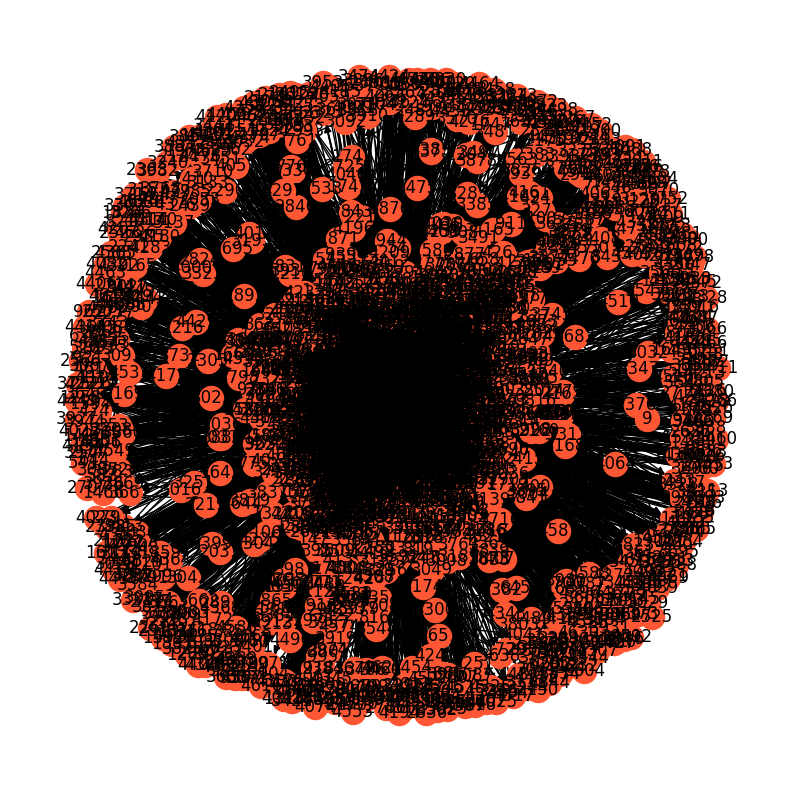

In [18]:
# Drawing
import matplotlib.pyplot as plt
layout = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(10,10))
plt.axis("off") 
nx.draw_networkx(G, layout, with_labels=True, node_color = '#FF5733' )

### 2.2 Calcular medidas de centralidad

#### 2.2.1. Grado (In-degree y Out-degree)

**¿Qué es?**

* **In-degree**: Número de aristas que llegan a un nodo.
* **Out-degree**: Número de aristas que salen de un nodo.

**¿Qué significa?**: Un nodo con un grado alto (ya sea in-degree o out-degree) tiene más conexiones y, por lo tanto, podría considerarse más "importante" o "central" dentro de la red.

**Propósito y utilidad**: En una red social, por ejemplo, un individuo con un alto in-degree podría ser alguien muy popular al que muchas personas siguen, mientras que un alto out-degree podría indicar una persona que sigue a muchos otros.

In [22]:
in_degrees = dict(G.in_degree())  # Retorna un diccionario con el "in-degree" de cada nodo
out_degrees = dict(G.out_degree())  # Retorna un diccionario con el "out-degree" de cada nodo

# Ordenar los diccionarios por valor en orden descendente
sorted_in_degrees = {k: v for k, v in sorted(in_degrees.items(), key=lambda item: item[1], reverse=True)}
sorted_out_degrees = {k: v for k, v in sorted(out_degrees.items(), key=lambda item: item[1], reverse=True)}

# Obtener los primeros 10 nodos con el mayor in-degree
top_10_in_degree = {k: sorted_in_degrees[k] for k in list(sorted_in_degrees)[:10]}
print("Top 10 nodos con el mayor In-degree:", top_10_in_degree)

# Obtener los primeros 10 nodos con el mayor out-degree
top_10_out_degree = {k: sorted_out_degrees[k] for k in list(sorted_out_degrees)[:10]}
print("Top 10 nodos con el mayor Out-degree:", top_10_out_degree)

Top 10 nodos con el mayor In-degree: {3719: 809, 1565: 578, 940: 430, 4397: 421, 1819: 404, 2475: 403, 1890: 308, 1376: 292, 2864: 278, 2922: 259}
Top 10 nodos con el mayor Out-degree: {1819: 618, 596: 538, 982: 367, 68: 365, 4142: 340, 2475: 339, 781: 327, 724: 315, 182: 300, 574: 255}


#### 2.2.2 Cercanía (Closeness)

**¿Qué es?**: 
La cercanía de un nodo se basa en la longitud de los caminos más cortos desde ese nodo a todos los demás nodos de la red.

**¿Qué significa?**: 
Un nodo con alta cercanía puede acceder rápidamente a otros nodos de la red, lo que podría ser útil para la difusión de información.

**Propósito y utilidad**: 
Se utiliza para identificar nodos que pueden propagar información de manera eficiente a través de la red.

In [23]:
closeness = nx.closeness_centrality(G)  # Retorna un diccionario con la centralidad de cercanía de cada nodo

# Ordenar el diccionario de 'closeness' en orden descendente
sorted_closeness = {k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)}

# Obtener y mostrar los 10 nodos con la mayor centralidad de cercanía
top_10_closeness = {k: sorted_closeness[k] for k in list(sorted_closeness)[:10]}
print("Top 10 nodos con el mayor Closeness:", top_10_closeness)


Top 10 nodos con el mayor Closeness: {1565: 0.3881587831965081, 4397: 0.3626490576873455, 4569: 0.3468253991849269, 940: 0.3412637466011752, 1258: 0.33756882748764516, 3921: 0.33460779621947984, 2192: 0.3298325992916012, 3719: 0.32608121131956885, 1210: 0.3174847260295751, 4443: 0.3174127462083431}


#### 2.2.3. Intermediación (Betweenness)

**¿Qué es?**: 
La intermediación mide la cantidad de veces que un nodo actúa como un puente a lo largo del camino más corto entre dos otros nodos.

**¿Qué significa?**: 
Un nodo con alta intermediación tiene un gran control sobre el flujo de información en la red y podría servir como un punto de conexión importante.

**Propósito y utilidad**: 
Se utiliza para identificar nodos que controlan la cohesión de la red. Eliminar un nodo con alta intermediación podría fragmentar la red.

In [24]:
betweenness = nx.betweenness_centrality(G)  # Retorna un diccionario con la centralidad de intermediación de cada nodo

# Ordenar el diccionario 'betweenness' en orden descendente
sorted_betweenness = {k: v for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)}

# Obtener y mostrar los 10 nodos con la mayor centralidad de intermediación
top_10_betweenness = {k: sorted_betweenness[k] for k in list(sorted_betweenness)[:10]}
print("Top 10 nodos con el mayor Betweenness:", top_10_betweenness)


Top 10 nodos con el mayor Betweenness: {1819: 0.032257463886773245, 3719: 0.020499363555620546, 2475: 0.018643134547630565, 982: 0.00976619806896769, 2864: 0.00940228657860956, 4142: 0.007382511374274264, 2922: 0.0063980091327664424, 596: 0.005615795371716813, 4607: 0.00542854025965783, 1397: 0.0053692412900968696}


#### 2.2.4 PageRank

**¿Qué es?**: 
PageRank es un algoritmo que asigna una puntuación a cada nodo en función de la cantidad y calidad de sus enlaces.

**¿Qué significa?**: 
Un nodo con un alto PageRank se considera más importante y es probable que reciba más visitas en el contexto de la web.

**Propósito y utilidad**: 
Originalmente, se utilizó para clasificar páginas web en resultados de búsqueda. En redes sociales y otros tipos de redes, se puede utilizar para identificar nodos influyentes.

In [25]:
pagerank = nx.pagerank(G)  # Retorna un diccionario con el PageRank de cada nodo

# Ordenar el diccionario 'pagerank' en orden descendente
sorted_pagerank = {k: v for k, v in sorted(pagerank.items(), key=lambda item: item[1], reverse=True)}

# Obtener y mostrar los 10 nodos con el mayor PageRank
top_10_pagerank = {k: sorted_pagerank[k] for k in list(sorted_pagerank)[:10]}
print("Top 10 nodos con el mayor PageRank:", top_10_pagerank)


Top 10 nodos con el mayor PageRank: {1565: 0.026780131029994735, 940: 0.024327852751302174, 3921: 0.014577424567806876, 3252: 0.012303889438982134, 3719: 0.012100840714028492, 4569: 0.01179428273845091, 4397: 0.011332420220189638, 4645: 0.010738020218213032, 4522: 0.006146321768144506, 4415: 0.00567546357268807}


## 3. Implementar el modelo de dispersión de influencia de Linear Threshold model (20%)

El modelo de umbral lineal (Linear Threshold Model, LTM) es un modelo que simula cómo se propaga una influencia a través de una red. En este modelo, cada nodo se considera "activo" o "inactivo" y se activa en función de un umbral específico que compara con la fracción de sus vecinos que están activos.

In [26]:
import random

def linear_threshold_model(G, initial_nodes, iterations=10):
    # Inicializar el conjunto de nodos activos con los nodos iniciales
    active_nodes = set(initial_nodes)
    
    # Establecer umbrales aleatorios para cada nodo
    thresholds = {node: random.uniform(0, 1) for node in G.nodes}
    
    for i in range(iterations):
        new_activated_nodes = set()
        
        for node in G.nodes:
            if node not in active_nodes:
                # Calcula la fracción de vecinos activos
                active_neighbors = sum(1 for neighbor in G.neighbors(node) if neighbor in active_nodes)
                fraction_active_neighbors = active_neighbors / G.degree(node)
                
                # Comprueba si la fracción supera el umbral
                if fraction_active_neighbors > thresholds[node]:
                    new_activated_nodes.add(node)
        
        # Actualiza el conjunto de nodos activos
        active_nodes |= new_activated_nodes
        
        # Si no se activan nuevos nodos, rompe el ciclo
        if not new_activated_nodes:
            break
    
    return active_nodes


## 4.  Calcular la dispersión de influencia sobre los top-10 nodos obtenidos por cada medida de centralidad. Esto implica 4 (o 5, si la red es dirigida) ejecuciones. Puede modificar el dataset incluyendo una función peso y/o de etiquetado, en caso de ser necesario y que tenga sentido con el dominio del problema (20%)


In [28]:
# Lista para almacenar los resultados de la dispersión de influencia
dispersion_results = {}

# Ejecutar el modelo de umbral lineal para cada conjunto de nodos iniciales
for top_10, measure in zip([top_10_in_degree, top_10_out_degree, top_10_closeness, top_10_betweenness, top_10_pagerank], 
                           ['In-degree', 'Out-degree', 'Closeness', 'Betweenness', 'PageRank']):
    active_nodes = linear_threshold_model(G, top_10)
    dispersion_results[measure] = len(active_nodes)

print("Resultados de la dispersión de influencia:")
for measure, result in dispersion_results.items():
    print(f"{measure}: {result} nodos activos")

Resultados de la dispersión de influencia:
In-degree: 370 nodos activos
Out-degree: 138 nodos activos
Closeness: 243 nodos activos
Betweenness: 264 nodos activos
PageRank: 239 nodos activos


## 5. Aplicar el coeficiente de correlación de Spearman para comparar los rankings obtenidos para medida de centralidad. Visualizar los datos en una matriz de correlaciones, indicando únicamente los valores con p-value <0.05 (20%)


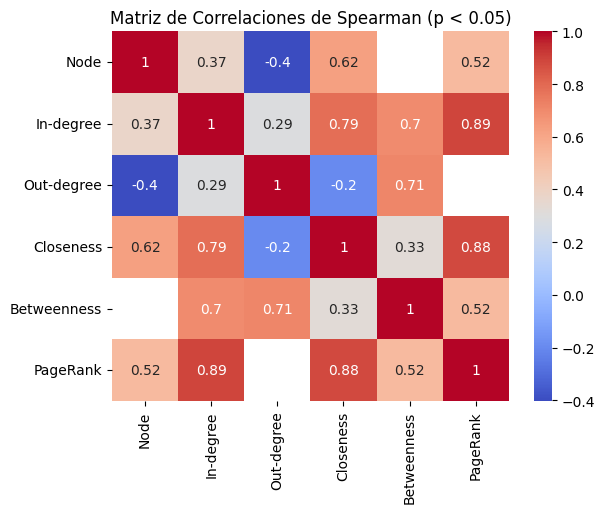

In [38]:
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes tus diccionarios de medidas de centralidad
# in_degrees, out_degrees, closeness, betweenness, pagerank

# Convertir los diccionarios en DataFrames de pandas
df_in_degree = pd.DataFrame(list(in_degrees.items()), columns=['Node', 'In-degree'])
df_out_degree = pd.DataFrame(list(out_degrees.items()), columns=['Node', 'Out-degree'])
df_closeness = pd.DataFrame(list(closeness.items()), columns=['Node', 'Closeness'])
df_betweenness = pd.DataFrame(list(betweenness.items()), columns=['Node', 'Betweenness'])
df_pagerank = pd.DataFrame(list(pagerank.items()), columns=['Node', 'PageRank'])

# Fusionar los DataFrames en uno solo
df = df_in_degree.merge(df_out_degree, on='Node').merge(df_closeness, on='Node').merge(df_betweenness, on='Node').merge(df_pagerank, on='Node')

# Calcular la matriz de correlación de Spearman
correlation_matrix = df.corr(method='spearman')

# Calcular los p-values
_, p_matrix = scipy.stats.spearmanr(df.iloc[:, :])

# Convertir la matriz de p-values en un DataFrame de pandas
p_value_df = pd.DataFrame(p_matrix, index=correlation_matrix.index, columns=correlation_matrix.columns)

# Filtrar por p-value < 0.05
significant = p_value_df < 0.05

# Reemplazar las celdas no significativas por NaN
filtered_corr = correlation_matrix.where(significant)

# Dibujar la matriz de correlaciones
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlaciones de Spearman (p < 0.05)")
plt.show()

## 6. Explicar en un párrafo cómo se interpretan los resultados obtenidos en 4) y 5) en el contexto del dominio de aplicación del dataset escogido (10%)